<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Teste_ShapiroWilk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Shapiro Wilk

## Implementação

In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [58]:
def generate_normal_random_values(count, min_val, max_val):
    mn = (max_val - min_val) / 2

    X = np.random.normal(loc=mn, scale=mn/3, size=count)
    X = np.clip(X, min_val, max_val)

    return X

In [59]:
def treat_values(values):
    values = [round(x, ndigits=0) for x in values]
    values = np.array(values)
    return values

In [121]:
n = 30
valores = generate_normal_random_values(n, 10, 100)

In [122]:
valores = treat_values(valores)

<Axes: ylabel='Count'>

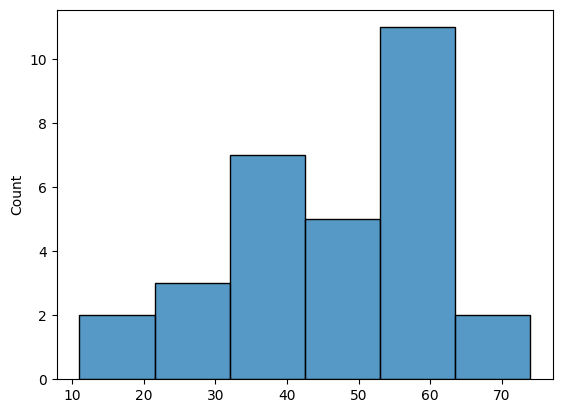

In [123]:
sns.histplot(valores)

In [124]:
valores.sort()
print(valores)

[11. 19. 22. 24. 26. 35. 36. 36. 36. 38. 38. 42. 43. 48. 49. 52. 52. 54.
 55. 56. 56. 57. 58. 58. 58. 61. 61. 61. 65. 74.]


In [125]:
# Informações importantes sobre o conjunto de valores
media = np.mean(valores)
var = np.var(valores)
dp = np.std(valores)
cont = len(valores)

print(' Média: ', media, '\n', 'Variância: ', var, '\n', 'Desvio Padrão: ', dp, '\n', 'Contagem: ', cont)

 Média:  46.03333333333333 
 Variância:  226.36555555555555 
 Desvio Padrão:  15.04544966279026 
 Contagem:  30


In [126]:
i = []
n_i_1 = []

for c in range(1, n+1):
  if c < (n+1)/2:
    i.append(c)
  else:
    n_i_1.append(c)

print(i)
print(n_i_1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [127]:
colunas = ['i',
           'n-i+1',
           'ain',
           'Xn-i+1',
           'Xi',
           'ain * Xn-i+1 - Xi']

In [128]:
tabela = pd.DataFrame(columns=colunas)

In [129]:
n_i_1.sort(reverse=True)

tabela['i'] = i

tabela['n-i+1'] = n_i_1

In [130]:
Xi = []
Xn_i_1 = []

for i, v in enumerate(valores):
  if i < (n)/2:
    Xi.append(v)
  else:
    Xn_i_1.append(v)

print(Xi)
print(Xn_i_1)

[11.0, 19.0, 22.0, 24.0, 26.0, 35.0, 36.0, 36.0, 36.0, 38.0, 38.0, 42.0, 43.0, 48.0, 49.0]
[52.0, 52.0, 54.0, 55.0, 56.0, 56.0, 57.0, 58.0, 58.0, 58.0, 61.0, 61.0, 61.0, 65.0, 74.0]


In [131]:
Xn_i_1.sort(reverse=True)

tabela['Xi'] = Xi

tabela['Xn-i+1'] = Xn_i_1

In [132]:
a = {
    1: [0.7071, 0.7071, 0.6872, 0.6646, 0.6431, 0.6233, 0.6052, 0.5888, 0.5739, 0.5601, 0.5475, 0.5359, 0.5251, 0.5150, 0.5056, 0.4968, 0.4886, 0.4808, 0.4734, 0.4643, 0.4590, 0.4542, 0.4493, 0.4450, 0.4407, 0.4366, 0.4328, 0.4291, 0.4254],
    2: [0, 0, 0.1677, 0.2413, 0.2806, 0.3031, 0.3164, 0.3244, 0.3291, 0.3315, 0.3325, 0.3325, 0.3318, 0.3306, 0.3290, 0.3273, 0.3253, 0.3232, 0.3211, 0.3185, 0.3156, 0.3126, 0.3098, 0.3069, 0.3043, 0.3018, 0.2992, 0.2968, 0.2944],
    3: [0, 0, 0, 0, 0.0875, 0.1401, 0.1743, 0.1976, 0.2141, 0.2260, 0.2347, 0.2412, 0.2460, 0.2495, 0.2521, 0.2540, 0.2553, 0.2561, 0.2565, 0.2578, 0.2571, 0.2563, 0.2554, 0.2543, 0.2533, 0.2522, 0.2510, 0.2499, 0.2487],
    4: [0, 0, 0, 0, 0, 0, 0.0561, 0.0947, 0.1224, 0.1429, 0.1586, 0.1707, 0.1802, 0.1878, 0.1939, 0.1988, 0.2027, 0.2059, 0.2085, 0.2119, 0.2131, 0.2139, 0.2145, 0.2148, 0.2151, 0.2152, 0.2151, 0.2150, 0.2148],
    5: [0, 0, 0, 0, 0, 0, 0, 0, 0.0399, 0.0695, 0.0922, 0.1099, 0.1240, 0.1353, 0.1447, 0.1524, 0.1587, 0.1641, 0.1686, 0.1736, 0.1764, 0.1787, 0.1807, 0.1822, 0.1836, 0.1848, 0.1857, 0.1864, 0.1870],
    6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0303, 0.0539, 0.0727, 0.0880, 0.1005, 0.1109, 0.1197, 0.1271, 0.1334, 0.1399, 0.1443, 0.1480, 0.1512, 0.1539, 0.1563, 0.1584, 0.1601, 0.1616, 0.1630],
    7: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0240, 0.0433, 0.0593, 0.0725, 0.0837, 0.0932, 0.1013, 0.1092, 0.1150, 0.1201, 0.1245, 0.1283, 0.1316, 0.1346, 0.1372, 0.1395, 0.1415],
    8: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0196, 0.0359, 0.0496, 0.0612, 0.0711, 0.0804, 0.0878, 0.0941, 0.0997, 0.1046, 0.1089, 0.1128, 0.1162, 0.1192, 0.1219],
    9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0163, 0.0303, 0.0422, 0.0530, 0.0618, 0.0696, 0.0764, 0.0823, 0.0876, 0.0923, 0.0965, 0.1002, 0.1036],
    10: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0140, 0.0263, 0.0368, 0.0459, 0.0539, 0.0610, 0.0672, 0.0728, 0.0778, 0.0822, 0.0862],
    11: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0122, 0.0228, 0.0321, 0.0403, 0.0476, 0.0540, 0.0598, 0.0650, 0.0697],
    12: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0107, 0.0200, 0.0284, 0.0358, 0.0424, 0.0483, 0.0537],
    13: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0094, 0.0178, 0.0253, 0.0320, 0.0381],
    14: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0084, 0.0159, 0.0227],
    15: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0000,	0.0076]
}

In [137]:
ain = []
m = (n/2) + 1

for i in range(1, int(m)):
  ain.append(a[i][n-2])

ain

[0.4254,
 0.2944,
 0.2487,
 0.2148,
 0.187,
 0.163,
 0.1415,
 0.1219,
 0.1036,
 0.0862,
 0.0697,
 0.0537,
 0.0381,
 0.0227,
 0.0076]

In [138]:
tabela['ain'] = ain

In [139]:
tabela['ain * Xn-i+1 - Xi'] = tabela['ain'] * (tabela['Xn-i+1'] - tabela['Xi'])

In [140]:
b = sum(tabela['ain * Xn-i+1 - Xi'])
b

80.2909

In [141]:
Wcalc = b**2 / ((n) * var)
Wcalc

0.9492946938545812

In [142]:
tabela

,i,n-i+1,ain,Xn-i+1,Xi,ain * Xn-i+1 - Xi
0,1,30,0.4254,74.0,11.0,26.8002
1,2,29,0.2944,65.0,19.0,13.5424
2,3,28,0.2487,61.0,22.0,9.6993
3,4,27,0.2148,61.0,24.0,7.9476
4,5,26,0.1870,61.0,26.0,6.5450
5,6,25,0.1630,58.0,35.0,3.7490
6,7,24,0.1415,58.0,36.0,3.1130
7,8,23,0.1219,58.0,36.0,2.6818
8,9,22,0.1036,57.0,36.0,2.1756
9,10,21,0.0862,56.0,38.0,1.5516


In [143]:
def shapiro_wilk_critico(n):
    # alfa = 0.05 (95% de confiança)

    if n <= 30:
        # valores entre 3 e 30
        shapiro_critico = [0.767, 0.748, 0.762, 0.788, 0.803, 0.818, 0.829, 0.842, 0.850, 0.859,
                      0.866, 0.874, 0.881, 0.887, 0.892, 0.897, 0.901, 0.905, 0.908, 0.911,
                      0.914, 0.916, 0.918, 0.920, 0.923, 0.924, 0.926, 0.927]
        sw_critico = shapiro_critico[n - 3]
    else:
        pass

    return sw_critico

In [144]:
Wcritico = shapiro_wilk_critico(cont)
Wcritico

0.927

In [145]:
if Wcalc > Wcritico:
  print("Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk")
else:
  print("Com 95% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk")

Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk


In [146]:
from scipy.stats import shapiro
from numpy.random import randn

# Realizar o teste de Shapiro-Wilk
stat, p = shapiro(valores)

# Exibir a estatística de teste e o valor p
print("Estatística de Teste:", stat)
print("Valor p:", p)

Estatística de Teste: 0.9505637884140015
Valor p: 0.1750389039516449
